In [234]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, confusion_matrix
import joblib

In [139]:
df = pd.read_csv("https://raw.githubusercontent.com/jamshid-ds/datasets/main/predicting_ccard_transaction_fraud_dataset/CreditCardData.csv")
df.head()

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1


In [140]:
df.shape # It is clear that we have a lot of data

(100000, 16)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Transaction ID          100000 non-null  object 
 1   Date                    100000 non-null  object 
 2   Day of Week             100000 non-null  object 
 3   Time                    100000 non-null  int64  
 4   Type of Card            100000 non-null  object 
 5   Entry Mode              100000 non-null  object 
 6   Amount                  99994 non-null   object 
 7   Type of Transaction     100000 non-null  object 
 8   Merchant Group          99990 non-null   object 
 9   Country of Transaction  100000 non-null  object 
 10  Shipping Address        99995 non-null   object 
 11  Country of Residence    100000 non-null  object 
 12  Gender                  99996 non-null   object 
 13  Age                     100000 non-null  float64
 14  Bank                 

In [142]:
print(df.Date.value_counts())
print(df["Day of Week"].value_counts())
print(df['Country of Transaction'].value_counts())
print(df['Bank'].value_counts())

14-Oct-20    50184
13-Oct-20    49814
16-Oct-20        1
15-Oct-20        1
Name: Date, dtype: int64
Wednesday    50177
Tuesday      49797
Friday          14
Thursday        12
Name: Day of Week, dtype: int64
United Kingdom    71199
USA                7298
Russia             7257
China              7152
India              7094
Name: Country of Transaction, dtype: int64
Barclays    29936
Monzo       10103
RBS         10046
Metro       10012
Barlcays     9993
Halifax      9988
Lloyds       9965
HSBC         9957
Name: Bank, dtype: int64


In [143]:
df = df.drop(["Date",'Day of Week','Transaction ID'],axis=1)
df.head()

,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1


In [144]:
print(df.isna().sum()) # we can use dropna because nan values are not many
df.dropna(inplace=True)

Time                       0
Type of Card               0
Entry Mode                 0
Amount                     6
Type of Transaction        0
Merchant Group            10
Country of Transaction     0
Shipping Address           5
Country of Residence       0
Gender                     4
Age                        0
Bank                       0
Fraud                      0
dtype: int64


In [145]:
data_copy = df.copy()

In [146]:
df['Type of Card'] = df['Type of Card'].replace({"Visa":1, "MasterCard":0})

VISA - 1
<br>
MasterCard - 0

In [147]:
df['Entry Mode'] = df['Entry Mode'].replace({"PIN":0,
                                             "CVC":1,
                                             "Tap":2})

PIN - 0
<br>
CVC - 1
<br>
Tap - 2

In [148]:
df.head()

,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,19,1,2,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,17,0,0,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,14,1,2,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,14,1,2,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,23,1,1,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1


In [149]:
a = list(df['Amount'])
b = []
for j in a:
  b.append(j[1:])
df['Amount'] = b

In [150]:
df["Type of Transaction"].unique()

array(['POS', 'Online', 'ATM'], dtype=object)

In [151]:
df['Type of Transaction'].replace({"POS":0,
                          "Online":1,
                          "ATM":2},inplace=True)

In [152]:
df.head()

,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,19,1,2,5,0,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,17,0,0,288,0,Services,USA,USA,USA,F,49.6,Lloyds,0
2,14,1,2,5,0,Restaurant,India,India,India,F,42.2,Barclays,0
3,14,1,2,28,0,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,23,1,1,91,1,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1


In [153]:
df["Merchant Group"].unique()

array(['Entertainment', 'Services', 'Restaurant', 'Electronics',
       'Children', 'Fashion', 'Food', 'Products', 'Subscription',
       'Gaming'], dtype=object)

In [154]:
df['Merchant Group'] = OrdinalEncoder().fit_transform(df[['Merchant Group']])

In [155]:
df['Country of Transaction'] = OrdinalEncoder().fit_transform(df[['Country of Transaction']])

In [156]:
df['Shipping Address'] = OrdinalEncoder().fit_transform(df[['Shipping Address']])
df['Country of Residence'] = OrdinalEncoder().fit_transform(df[['Country of Residence']])
df['Bank'] = OrdinalEncoder().fit_transform(df[['Bank']])

In [157]:
df

,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,19,1,2,5,0,2.0,4.0,4.0,4.0,M,25.2,7.0,0
1,17,0,0,288,0,8.0,3.0,3.0,3.0,F,49.6,4.0,0
2,14,1,2,5,0,7.0,1.0,1.0,1.0,F,42.2,0.0,0
3,14,1,2,28,0,2.0,4.0,1.0,4.0,F,51.0,0.0,0
4,23,1,1,91,1,1.0,3.0,3.0,4.0,M,38.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,22,0,2,15,0,1.0,4.0,4.0,4.0,F,53.8,3.0,0
99996,23,0,0,7,2,0.0,2.0,2.0,2.0,M,45.0,0.0,0
99997,11,0,0,21,2,9.0,4.0,4.0,4.0,F,46.5,2.0,0
99998,22,1,2,25,0,6.0,4.0,4.0,4.0,M,48.2,0.0,0


In [158]:
df['Gender'] = df['Gender'].replace({'M':0,
                                     "F":1})

In [159]:
df

,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,19,1,2,5,0,2.0,4.0,4.0,4.0,0,25.2,7.0,0
1,17,0,0,288,0,8.0,3.0,3.0,3.0,1,49.6,4.0,0
2,14,1,2,5,0,7.0,1.0,1.0,1.0,1,42.2,0.0,0
3,14,1,2,28,0,2.0,4.0,1.0,4.0,1,51.0,0.0,0
4,23,1,1,91,1,1.0,3.0,3.0,4.0,0,38.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,22,0,2,15,0,1.0,4.0,4.0,4.0,1,53.8,3.0,0
99996,23,0,0,7,2,0.0,2.0,2.0,2.0,0,45.0,0.0,0
99997,11,0,0,21,2,9.0,4.0,4.0,4.0,1,46.5,2.0,0
99998,22,1,2,25,0,6.0,4.0,4.0,4.0,0,48.2,0.0,0


In [160]:
data_copy

,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,22,MasterCard,Tap,£15,POS,Electronics,United Kingdom,United Kingdom,United Kingdom,F,53.8,Halifax,0
99996,23,MasterCard,PIN,£7,ATM,Children,Russia,Russia,Russia,M,45.0,Barclays,0
99997,11,MasterCard,PIN,£21,ATM,Subscription,United Kingdom,United Kingdom,United Kingdom,F,46.5,HSBC,0
99998,22,Visa,Tap,£25,POS,Products,United Kingdom,United Kingdom,United Kingdom,M,48.2,Barclays,0


In [163]:
df['Amount'] = pd.to_numeric(df['Amount'])

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99977 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time                    99977 non-null  int64  
 1   Type of Card            99977 non-null  int64  
 2   Entry Mode              99977 non-null  int64  
 3   Amount                  99977 non-null  int64  
 4   Type of Transaction     99977 non-null  int64  
 5   Merchant Group          99977 non-null  float64
 6   Country of Transaction  99977 non-null  float64
 7   Shipping Address        99977 non-null  float64
 8   Country of Residence    99977 non-null  float64
 9   Gender                  99977 non-null  int64  
 10  Age                     99977 non-null  float64
 11  Bank                    99977 non-null  float64
 12  Fraud                   99977 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 10.7 MB


In [170]:
df.corrwith(df['Fraud']).abs().sort_values()

Age                       0.002778
Bank                      0.006736
Type of Transaction       0.030787
Type of Card              0.034850
Gender                    0.047535
Merchant Group            0.069093
Country of Residence      0.105816
Entry Mode                0.109559
Amount                    0.109822
Time                      0.286283
Shipping Address          0.292431
Country of Transaction    0.307040
Fraud                     1.000000
dtype: float64

In [173]:
df['Fraud'].value_counts()

0    92785
1     7192
Name: Fraud, dtype: int64

In [176]:
df_fraud0 = df[df['Fraud']==0].sample(7192)

In [179]:
df_fraud1 = df[df['Fraud']==1]
df_fraud1

,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
4,23,1,1,91,1,1.0,3.0,3.0,4.0,0,38.0,3.0,1
11,1,0,0,106,0,3.0,2.0,2.0,4.0,1,48.7,5.0,1
16,0,0,1,25,1,4.0,2.0,2.0,4.0,0,54.3,1.0,1
37,3,0,0,5,2,8.0,0.0,0.0,4.0,1,62.8,1.0,1
42,4,1,0,206,0,0.0,4.0,1.0,4.0,0,46.3,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99949,1,0,0,30,2,3.0,0.0,0.0,4.0,0,33.9,0.0,1
99954,12,0,1,386,1,6.0,0.0,0.0,4.0,0,56.4,0.0,1
99969,18,1,0,21,2,9.0,4.0,3.0,4.0,0,50.1,0.0,1
99974,9,0,1,211,1,9.0,0.0,0.0,4.0,1,44.2,0.0,1


In [181]:
df = df_fraud0.append(df_fraud1)

<ipython-input-181-2c6e5f26098e>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_fraud0.append(df_fraud1)


In [182]:
df

,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
34672,16,0,0,196,0,8.0,1.0,1.0,1.0,0,26.4,4.0,0
74816,13,1,1,55,1,3.0,4.0,3.0,4.0,1,52.5,4.0,0
17283,23,1,0,24,2,4.0,4.0,3.0,4.0,1,49.7,0.0,0
31352,16,1,0,45,0,0.0,3.0,3.0,3.0,0,59.7,3.0,0
7330,21,1,0,63,0,8.0,4.0,1.0,4.0,0,36.3,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99949,1,0,0,30,2,3.0,0.0,0.0,4.0,0,33.9,0.0,1
99954,12,0,1,386,1,6.0,0.0,0.0,4.0,0,56.4,0.0,1
99969,18,1,0,21,2,9.0,4.0,3.0,4.0,0,50.1,0.0,1
99974,9,0,1,211,1,9.0,0.0,0.0,4.0,1,44.2,0.0,1


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14384 entries, 34672 to 99993
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time                    14384 non-null  int64  
 1   Type of Card            14384 non-null  int64  
 2   Entry Mode              14384 non-null  int64  
 3   Amount                  14384 non-null  int64  
 4   Type of Transaction     14384 non-null  int64  
 5   Merchant Group          14384 non-null  float64
 6   Country of Transaction  14384 non-null  float64
 7   Shipping Address        14384 non-null  float64
 8   Country of Residence    14384 non-null  float64
 9   Gender                  14384 non-null  int64  
 10  Age                     14384 non-null  float64
 11  Bank                    14384 non-null  float64
 12  Fraud                   14384 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 1.5 MB


In [184]:
df.head()

,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
34672,16,0,0,196,0,8.0,1.0,1.0,1.0,0,26.4,4.0,0
74816,13,1,1,55,1,3.0,4.0,3.0,4.0,1,52.5,4.0,0
17283,23,1,0,24,2,4.0,4.0,3.0,4.0,1,49.7,0.0,0
31352,16,1,0,45,0,0.0,3.0,3.0,3.0,0,59.7,3.0,0
7330,21,1,0,63,0,8.0,4.0,1.0,4.0,0,36.3,4.0,0


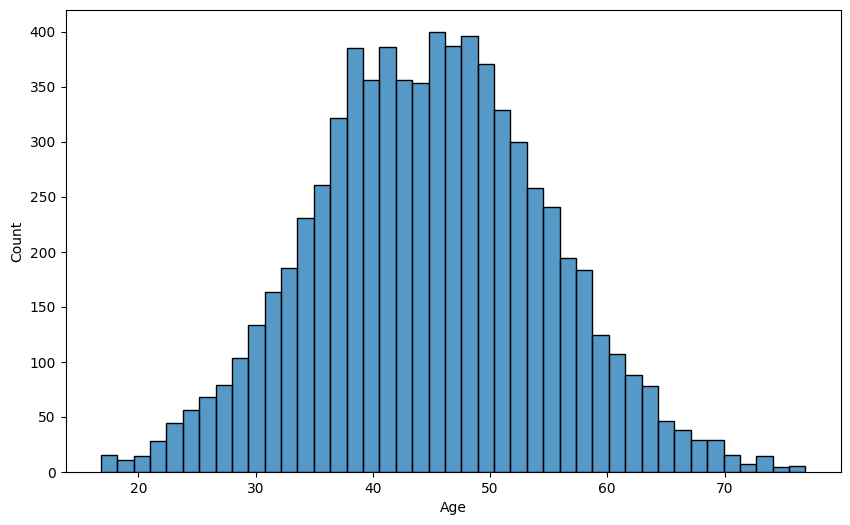

In [189]:
plt.figure(figsize=(10,6))
sns.histplot(data=df[df["Fraud"]==1], x="Age")
plt.show()

It is clear from the graph that. The average age of victims of transaction fraud is between 40 and 50

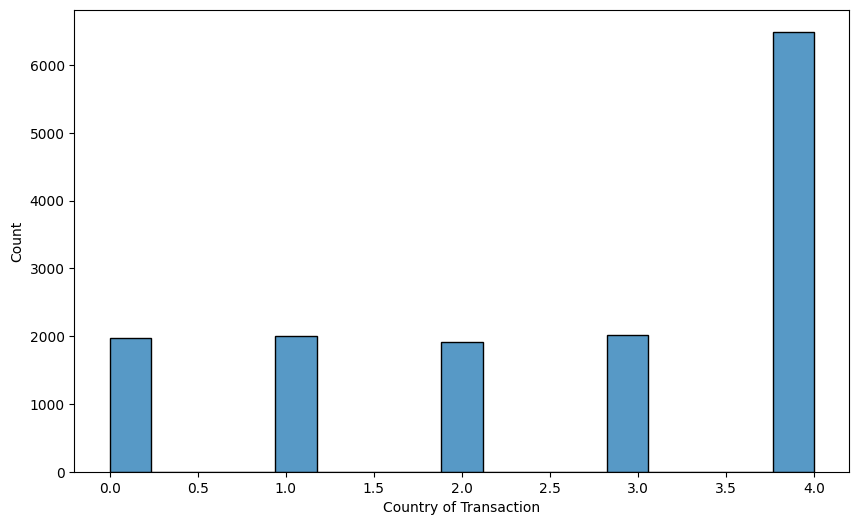

In [195]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Country of Transaction")
plt.show()

In [201]:
X = df.drop("Fraud",axis=1).values
Y = df['Fraud'].values

In [204]:
train_set_x, test_set_x, train_set_y, test_set_y = train_test_split(X,Y,test_size=0.2, random_state=2)

In [ ]:
DecisionTreeClassifier = DecisionTreeClassifier()

In [222]:
tree_model = DecisionTreeClassifier.fit(train_set_x, train_set_y)

In [226]:
y_predict = tree_model.predict_proba(test_set_x)[:, 1]

In [227]:
y_predict

array([1., 0., 0., ..., 0., 0., 1.])

In [229]:
mean_absolute_error(test_set_y, y_predict)

0.05665623913799096

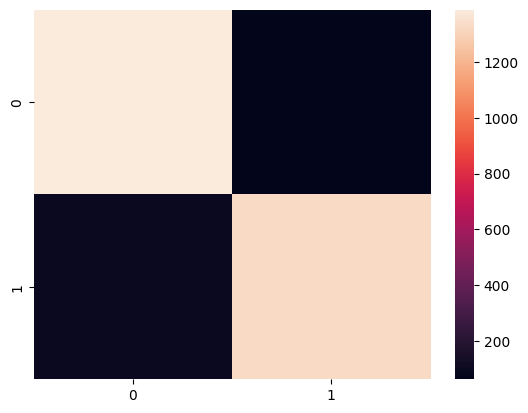

In [233]:
sns.heatmap(confusion_matrix(test_set_y, y_predict))
plt.show()

In [231]:
mean_absolute_percentage_error(test_set_y, y_predict)

97053589467143.16

our model is working with 97% accuracy

In [236]:
joblib.dump(tree_model,"tree_model")

['tree_model']